<a href="https://colab.research.google.com/github/Diksha-Arsule/noderest/blob/main/prac2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
len(x_train)
len(x_test)

10000

In [7]:
x_train.shape
x_test.shape

(10000, 28, 28)

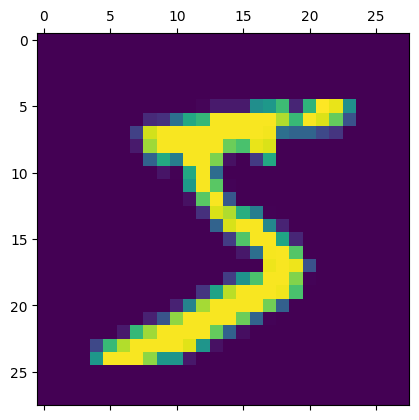

In [8]:
# how first image will be appear
x_train[0]
plt.matshow(x_train[0])

In [9]:
# Convert pixels in range f 0 to 1 by dividing 255
x_train = x_train/255
x_test = x_test/255

In [10]:
# Model Network Architecture
model = keras.Sequential ([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Model Compile
model.compile(optimizer='sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])
# model fit
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7292 - loss: 1.0473 - val_accuracy: 0.9031 - val_loss: 0.3597
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9038 - loss: 0.3492 - val_accuracy: 0.9190 - val_loss: 0.2915
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9188 - loss: 0.2914 - val_accuracy: 0.9294 - val_loss: 0.2576
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9281 - loss: 0.2560 - val_accuracy: 0.9334 - val_loss: 0.2351
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9338 - loss: 0.2342 - val_accuracy: 0.9394 - val_loss: 0.2151
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9394 - loss: 0.2175 - val_accuracy: 0.9429 - val_loss: 0.2018
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9458 - loss: 0.1934 - val_accuracy: 0.9469 - val_loss: 0.1868
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9491 - loss: 0.1839 - 

In [14]:
test_loss, test_acc= model.evaluate(x_test, y_test)
print("Loss = %.3f"% test_loss)
print("Accuracy = %.3f"% test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9472 - loss: 0.1845
Loss = 0.159
Accuracy = 0.954


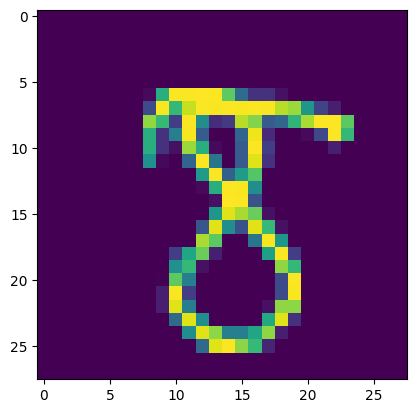

In [16]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [17]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Handwritten number in the image is= 3


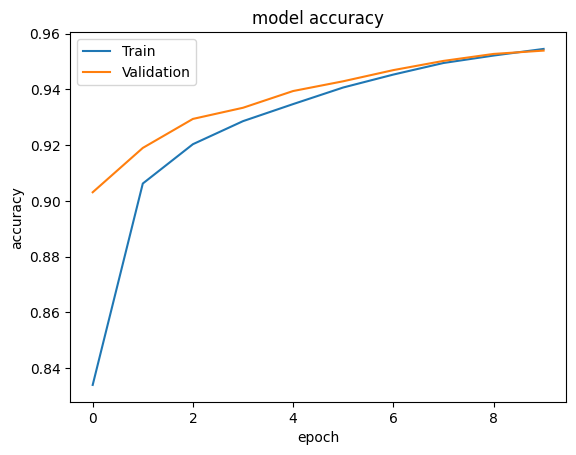

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

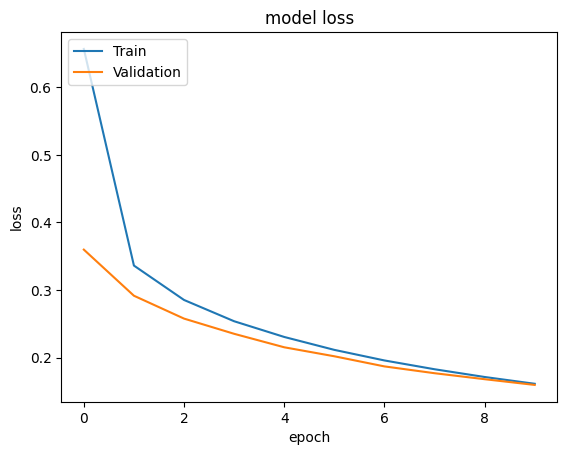

Model saved successfully at: C:/Users/Diksha/mnist_model.h5


In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Saving the model properly
keras_model_path = 'C:/Users/Diksha/mnist_model.h5'
model.save(keras_model_path)

print("Model saved successfully at:", keras_model_path)


In [25]:
#use the save model
restored_keras_model = tf.keras.models.load_model(keras_model_path)